In [993]:
# importing packages

In [994]:
import pandas as pd
import glob
files = glob.glob("/Users/ravi/python/KT4" + "/*.csv")

In [995]:
# adding all user files into a single data frame

In [996]:
content=[]
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename, index_col=None)
    text=str(filename)
    ntext=text.strip('Users/ravi/python/KT4/')
    user=ntext.strip('.cs')
    df["user"]=user
    df.to_csv(filename,index=False)
    content.append(df)
  
# converting content to data frame
data_frame = pd.concat(content)

In [997]:
#  filtering data

In [998]:
data1=data_frame[data_frame['action_type']=='respond']

In [999]:
d2=data1.groupby('user').aggregate({'item_id':'count'})

In [1000]:
# findind number of questions answered by each user

In [1001]:
# merging with questions table to compare user answers 

In [1002]:
questions=pd.read_csv("/Users/ravi/python/contents/questions.csv")

In [1003]:
data=pd.merge(data1,questions, how='left', left_on=['item_id'], right_on=['question_id'])

In [1004]:
final_data = data.drop(['bundle_id','explanation_id','part','tags','deployed_at'],axis = 1)

In [1005]:
# logic to find number of questions   answered correctly by user
#marking correct answer as 1 and 0 

In [1006]:
marks = []
for i in range(len(final_data)):
    if final_data['user_answer'].iloc[i] == final_data['correct_answer'].iloc[i]:
        marks.append(1)
    else:
        marks.append(0)

In [1007]:
# append marks to the data frame

In [1008]:
final_data['Ans_status']=marks

In [1009]:
# suming user answers to find total number of correct answers by each user
final_data

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user,question_id,correct_answer,Ans_status
0,1561967886867,respond,q6418,NaN,diagnosis,c,mobile,u835,q6418,c,1
1,1561967913644,respond,q527,NaN,diagnosis,b,mobile,u835,q527,b,1
2,1561967935998,respond,q6269,NaN,diagnosis,b,mobile,u835,q6269,a,0
3,1561967990364,respond,q4918,NaN,diagnosis,c,mobile,u835,q4918,c,1
4,1561968034375,respond,q8701,NaN,diagnosis,a,mobile,u835,q8701,a,1
...,...,...,...,...,...,...,...,...,...,...,...
854116,1572300986310,respond,q17757,NaN,sprint,b,web,u192,q17757,b,1
854117,1572301033406,respond,q18003,NaN,sprint,b,web,u192,q18003,b,1
854118,1572301291271,respond,q18125,NaN,sprint,a,web,u192,q18125,a,1
854119,1572301326677,respond,q17839,NaN,sprint,c,web,u192,q17839,c,1


In [1010]:
dx= final_data.groupby('user').sum()

In [1011]:
result = pd.concat([d2, dx], axis=1, join="inner")

In [1012]:
# code for data processing 

In [1013]:
result=result.drop(['timestamp','cursor_time'],axis = 1)

In [1014]:
result = result.rename({'Ans_status': 'no_correct_ans', 'item_id': 'total_questions'}, axis=1)

In [1015]:
cols = result.columns.tolist()

In [1016]:
cols = cols[-1:] + cols[:-1]

In [1017]:
result=result[cols]

In [1018]:
# printing user marks metrics 

In [1019]:
result.head()

,no_correct_ans,total_questions
user,,
u1,369,584
u10,1,1
u100,12,25
u1000,743,1322
u1001,2,13


In [1020]:
# merging lectures file to eveluate activity metrics 

In [1021]:
lectures=pd.read_csv("/Users/ravi/python/contents/lectures.csv")

In [1022]:
lseries=data_frame["item_id"].str.startswith("l")

In [1023]:
lec=data_frame[lseries]

In [1024]:
lecture_data=pd.merge(lec,lectures, how='left', left_on=['item_id'], right_on=['lecture_id'])

In [1025]:
lecture_final = lecture_data.drop(['cursor_time','timestamp','source','user_answer','platform','part','tags','deployed_at'],axis = 1)

In [1026]:
lecture_final =lecture_final[lecture_final['action_type']=='play_video']

In [1027]:
result1b=lecture_final.groupby('user').aggregate({'lecture_id':'nunique'})

In [1028]:
result1b = result1b.rename({'lecture_id': 'no_lectures_watched'}, axis=1)

In [1029]:
result1b.head()

,no_lectures_watched
user,
u1,24
u100,2
u1000,94
u1002,6
u1003,7


In [1030]:
# metrics for explinations ready by users

In [1031]:
eseries=data_frame["item_id"].str.startswith("e")

In [1032]:
exp=data_frame[eseries]

In [1033]:
exp_data=pd.merge(exp,questions, how='left', left_on=['item_id'], right_on=['explanation_id'])

In [1034]:
result1c= exp_data.groupby('user').aggregate({'explanation_id':'nunique'})

In [1035]:
result1c = result1c.rename({'explanation_id': 'no_explinations_read'}, axis=1)

In [1036]:
result1c.head()

,no_explinations_read
user,
u1,482
u10,1
u100,14
u1000,832
u1002,60


In [1037]:
# metrics for audios  listened  by users

In [1038]:
bseries=data_frame["item_id"].str.startswith("b")

In [1039]:
audio=data_frame[bseries]

In [1040]:
audio =audio[audio['action_type']=='submit']

In [1041]:
audio_data=pd.merge(audio,questions, how='left', left_on=['item_id'], right_on=['bundle_id'])

In [1042]:
result1d= audio_data.groupby('user').aggregate({'bundle_id':'nunique'})

In [1043]:
result1d = result1d.rename({'bundle_id': 'no_audio_listened'}, axis=1)

In [1044]:
result1d.head(100)

,no_audio_listened
user,
u1,477
u10,1
u100,23
u1000,837
u1001,7
...,...
u188,7
u189,9
u19,78


In [1045]:
# user profile table

In [1046]:
from functools import reduce

# compile the list of dataframes you want to merge
fx = [result,result1b, result1c, result1d]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user'],
                                            how='outer'), fx)

In [1047]:
df_merged.head(100)


,no_correct_ans,total_questions,no_lectures_watched,no_explinations_read,no_audio_listened
user,,,,,
u1,369,584,24.0,482.0,477
u10,1,1,NaN,1.0,1
u100,12,25,2.0,14.0,23
u1000,743,1322,94.0,832.0,837
u1001,2,13,NaN,NaN,7
...,...,...,...,...,...
u188,1,7,1.0,NaN,7
u189,4,10,NaN,2.0,9
u19,14,114,NaN,142.0,78


In [1048]:
df_merged['marks_percentage']=round(df_merged['no_correct_ans']*100/df_merged['total_questions'],2)

In [1049]:
#  additional metrics # finding source metrics for each user

In [1050]:
metrics = pd.DataFrame(pd.DataFrame(final_data.groupby(['user','source']).count())['timestamp'])

In [1051]:
metrics['Sources Count'] = metrics['timestamp']

In [1052]:
metrics.drop('timestamp', axis = 1,inplace = True)

In [1053]:
metrics.to_csv("ad1metrics.csv")

In [1054]:
metrics.head(100)


Sources Count
user source                       
u1   adaptive_offer             15
     diagnosis                   7
     review_quiz                12
     sprint                    526
     tutor                      24
...                            ...
u12  diagnosis                  13
     sprint                     38
u120 diagnosis                  13
     sprint                     35
     tutor                       8

[100 rows x 1 columns]

In [1055]:
final_data = final_data[final_data.source=='sprint']
nxt= (final_data).groupby(final_data['user']).aggregate({'item_id':'count'})
nxt = nxt.rename({'item_id': 'sprints'}, axis=1)
nxt

,sprints
user,
u1,526
u100,6
u1000,1139
u1002,17
u1003,42
...,...
u995,22784
u996,4
u997,93


In [1056]:
df_merged = pd.merge(df_merged,nxt, how='left', left_on=['user'], right_on=['user'])

In [1057]:
df_merged.to_csv("usertable.csv")

In [1058]:
df_merged

,no_correct_ans,total_questions,no_lectures_watched,no_explinations_read,no_audio_listened,marks_percentage,sprints
user,,,,,,,
u1,369,584,24.0,482.0,477,63.18,526.0
u10,1,1,NaN,1.0,1,100.00,NaN
u100,12,25,2.0,14.0,23,48.00,6.0
u1000,743,1322,94.0,832.0,837,56.20,1139.0
u1001,2,13,NaN,NaN,7,15.38,NaN
...,...,...,...,...,...,...,...
u995,11601,30113,160.0,4884.0,4887,38.52,22784.0
u996,8,14,5.0,4.0,11,57.14,4.0
u997,83,113,3.0,82.0,87,73.45,93.0


In [1059]:
# additional metrics 2 - percentage of platforms(web,mobile) used by users

In [1060]:
print(final_data['platform'].value_counts()*100/len(final_data))

mobile    57.605232
web       42.394768
Name: platform, dtype: float64


In [1061]:
# additional metrics 3- percentage of each source used by users 

In [1062]:
print(final_data['source'].value_counts()*100/len(final_data))

sprint    100.0
Name: source, dtype: float64


In [1063]:
# question 2

In [1064]:
qseries=data_frame["item_id"].str.startswith("q")

In [1065]:
qdata=data_frame[qseries]

In [1066]:
qx=pd.merge(qdata,questions, how='left', left_on=['item_id'], right_on=['question_id'])

In [1067]:
funresult2=qx.groupby('question_id').aggregate({'user':'nunique'})

In [1068]:
funresult2=funresult2.rename({'user': 'users practiced'}, axis=1)

In [1069]:
# printing 2a result

In [1070]:
funresult2

,users practiced
question_id,
q1,53
q10,239
q100,73
q1000,157
q10000,25
...,...
q9995,17
q9996,27
q9997,31


In [1071]:
# finding number of questions belongs to each part

In [1072]:
typedata=pd.merge(data1,questions, how='left', left_on=['item_id'], right_on=['question_id'])

In [1073]:
result2b=typedata.groupby('part').aggregate({'item_id':'nunique'})

In [1074]:
result2b = result2b.rename({'item_id': 'no_questions'}, axis=1)

In [1075]:
#printing result 2b

In [1076]:
result2b.head(10)

,no_questions
part,
1,621
2,1548
3,1086
4,1005
5,5015
6,1200
7,1075


In [1077]:
#finding number of times each question practised 

In [1078]:
result2c=typedata.groupby('item_id').aggregate({'action_type':'count'})

In [1079]:
result2c=result2c.rename({'action_type': 'no_times_practised'}, axis=1)

In [1080]:
# printing result 2c

In [1081]:
result2c.head(100)

,no_times_practised
item_id,
q1,66
q10,411
q100,92
q1000,249
q10000,42
...,...
q10092,36
q10093,52
q10094,44


In [1082]:
# finding count of users  answered questions correctly

In [1083]:
correct = []
for i in range(len(typedata)):
    if typedata['user_answer'].iloc[i] == typedata['correct_answer'].iloc[i]:
        correct.append(1)
    else:
        correct.append(0)

In [1084]:
typedata['correct']=correct

In [1085]:
result2d=typedata.groupby('question_id').aggregate({'correct':'sum'})

In [1086]:
#print result 2d

In [1087]:
result2d.rename({'correct': 'no_times_answered_correctly'}, axis=1)

,no_times_answered_correctly
question_id,
q1,54
q10,137
q100,85
q1000,132
q10000,19
...,...
q9995,20
q9996,21
q9997,17


In [1088]:
# questions table metrics 

In [1089]:
questionsresult = pd.concat([result2c, result2d], axis=1, join="inner")

In [1090]:
questionsresult=questionsresult.rename({'correct': 'no_times_answered_correctly'}, axis=1)

In [1091]:
 questionsresult['percentage'] = round(questionsresult['no_times_answered_correctly']*100/questionsresult['no_times_practised'],2)

In [1092]:
questionsresult.to_csv("questionsresult.csv")

In [1093]:
questionsresult

,no_times_practised,no_times_answered_correctly,percentage
q1,66,54,81.82
q10,411,137,33.33
q100,92,85,92.39
q1000,249,132,53.01
q10000,42,19,45.24
...,...,...,...
q9995,44,20,45.45
q9996,45,21,46.67
q9997,43,17,39.53
q9998,33,19,57.58


In [1094]:
questionsresult.to_csv("questionstable.csv")


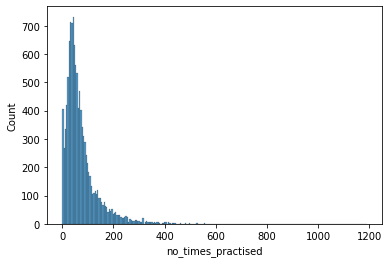

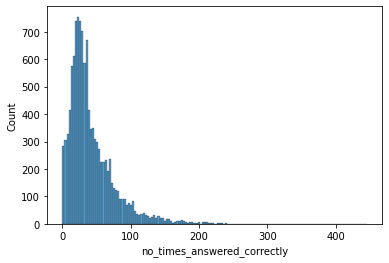

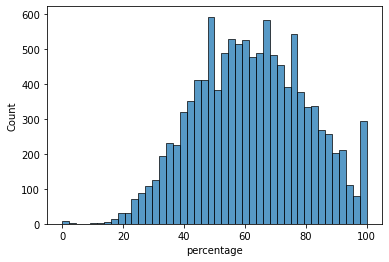

In [1095]:
for i in questionsresult.columns:
    sns.histplot(questionsresult[i])
    plt.show()

In [1096]:
# finding top ten users for there activity on application

In [1097]:
resultfun=result.sort_values("no_correct_ans",ascending=False).head(10)

In [1098]:
resultfun

,no_correct_ans,total_questions
user,,
u226,12310,41071
u995,11601,30113
u929,9911,12153
u743,7743,12906
u622,7256,10508
u361,7018,10687
u968,6654,9887
u50,6400,8126
u712,6068,9448


In [1099]:
top_ten = pd.merge(resultfun,df_merged, how='inner', left_on=['user','no_correct_ans','total_questions'], right_on=['user','no_correct_ans','total_questions'])

In [1100]:
top_ten

,no_correct_ans,total_questions,no_lectures_watched,no_explinations_read,no_audio_listened,marks_percentage,sprints
user,,,,,,,
u226,12310,41071,28.0,2160.0,2031,29.97,35027.0
u995,11601,30113,160.0,4884.0,4887,38.52,22784.0
u929,9911,12153,100.0,6790.0,6795,81.55,7489.0
u743,7743,12906,168.0,7154.0,7152,60.00,10933.0
u622,7256,10508,40.0,1589.0,1654,69.05,5634.0
u361,7018,10687,109.0,3351.0,3345,65.67,5376.0
u968,6654,9887,82.0,4322.0,4285,67.30,7501.0
u50,6400,8126,96.0,1814.0,1801,78.76,2546.0
u712,6068,9448,136.0,2915.0,2934,64.23,4510.0


In [1101]:
top_ten['marks percentage']= round(top_ten['no_correct_ans']*100/top_ten['total_questions'],2)

In [1102]:
correct = []
for i in range(len(top_ten)):
             correct.append(top_ten['total_questions'].iloc[i]+top_ten['no_lectures_watched'].iloc[i]+top_ten['no_audio_listened'].iloc[i]+top_ten['no_explinations_read'].iloc[i])
   

In [1103]:
top_ten['Activity_score']= correct

In [1104]:
top_ten.to_csv("top_ten.csv")

In [1105]:
top_ten

,no_correct_ans,total_questions,no_lectures_watched,no_explinations_read,no_audio_listened,marks_percentage,sprints,marks percentage,Activity_score
user,,,,,,,,,
u226,12310,41071,28.0,2160.0,2031,29.97,35027.0,29.97,45290.0
u995,11601,30113,160.0,4884.0,4887,38.52,22784.0,38.52,40044.0
u929,9911,12153,100.0,6790.0,6795,81.55,7489.0,81.55,25838.0
u743,7743,12906,168.0,7154.0,7152,60.00,10933.0,60.00,27380.0
u622,7256,10508,40.0,1589.0,1654,69.05,5634.0,69.05,13791.0
u361,7018,10687,109.0,3351.0,3345,65.67,5376.0,65.67,17492.0
u968,6654,9887,82.0,4322.0,4285,67.30,7501.0,67.30,18576.0
u50,6400,8126,96.0,1814.0,1801,78.76,2546.0,78.76,11837.0
u712,6068,9448,136.0,2915.0,2934,64.23,4510.0,64.23,15433.0


In [1106]:
single_user = pd.read_csv("/Users/ravi/python/KT4/u1.csv")

In [1107]:
single_user

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user
0,1565096151269,enter,b3544,NaN,diagnosis,NaN,mobile,u1
1,1565096187972,respond,q5012,NaN,diagnosis,b,mobile,u1
2,1565096194904,submit,b3544,NaN,diagnosis,NaN,mobile,u1
3,1565096195001,enter,b3238,NaN,diagnosis,NaN,mobile,u1
4,1565096218682,respond,q4706,NaN,diagnosis,c,mobile,u1
...,...,...,...,...,...,...,...,...
3990,1569647530053,play_audio,b8332,0.0,my_note,NaN,mobile,u1
3991,1569647567859,pause_audio,b8332,34853.0,my_note,NaN,mobile,u1
3992,1569647618094,play_audio,b8332,1045.0,my_note,NaN,mobile,u1
3993,1569647652076,pause_audio,b8332,34848.0,my_note,NaN,mobile,u1


In [1108]:
import datetime
time_x =[]
for i in range(len(single_user)):
   time_x.append(datetime.datetime.fromtimestamp(df['timestamp'][i]/ 1000).strftime('%Y-%m-%d %H:%M:%S.%f'))
single_user['Time'] = time_x
    

In [1109]:

single_user = pd.merge(single_user,questions, how='left', left_on=['item_id'], right_on=['question_id'])
single_user.to_csv("u1_timed.csv")

In [1110]:
single_user

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user,Time,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,1565096151269,enter,b3544,NaN,diagnosis,NaN,mobile,u1,2019-05-08 02:17:25.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1565096187972,respond,q5012,NaN,diagnosis,b,mobile,u1,2019-05-08 02:17:26.136000,q5012,b3544,e3544,c,5.0,74,1.568688e+12
2,1565096194904,submit,b3544,NaN,diagnosis,NaN,mobile,u1,2019-05-08 02:17:45.055000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1565096195001,enter,b3238,NaN,diagnosis,NaN,mobile,u1,2019-05-08 02:17:49.413000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1565096218682,respond,q4706,NaN,diagnosis,c,mobile,u1,2019-05-08 02:17:54.700000,q4706,b3238,e3238,c,5.0,71,1.572414e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,1569647530053,play_audio,b8332,0.0,my_note,NaN,mobile,u1,2019-06-01 02:06:23.807000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3991,1569647567859,pause_audio,b8332,34853.0,my_note,NaN,mobile,u1,2019-06-01 02:06:27.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3992,1569647618094,play_audio,b8332,1045.0,my_note,NaN,mobile,u1,2019-06-01 02:06:27.111000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3993,1569647652076,pause_audio,b8332,34848.0,my_note,NaN,mobile,u1,2019-06-01 02:06:28.377000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


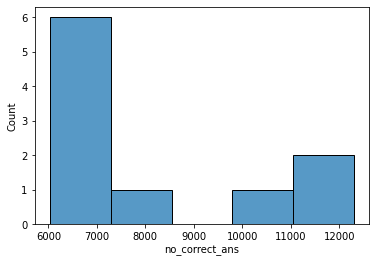

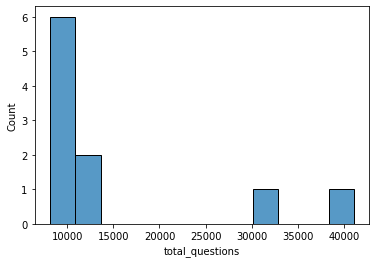

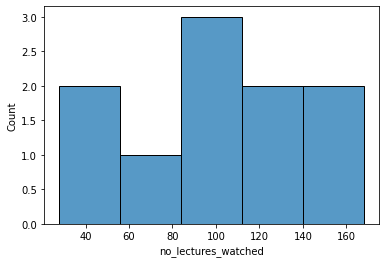

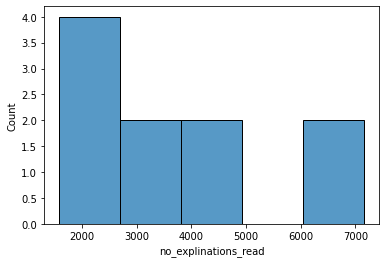

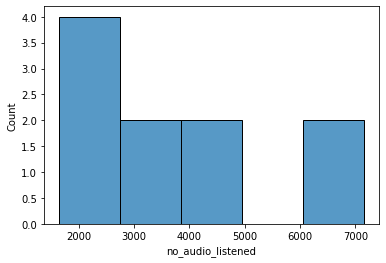

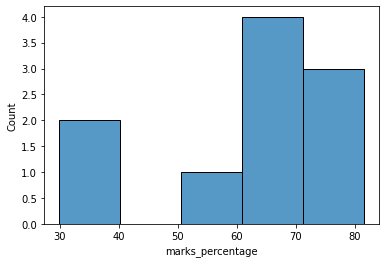

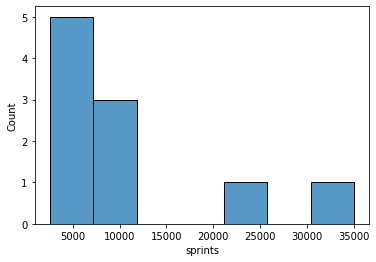

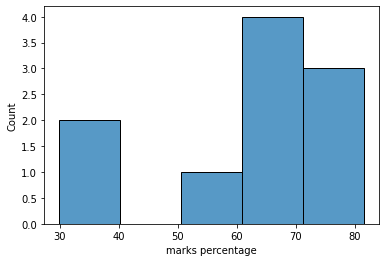

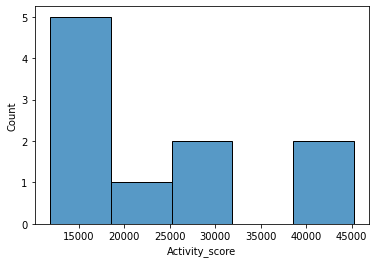

In [1111]:
for i in top_ten.columns:
    sns.histplot(top_ten[i])
    plt.show()

In [1112]:
top_ten.columns

Index(['no_correct_ans', 'total_questions', 'no_lectures_watched',
       'no_explinations_read', 'no_audio_listened', 'marks_percentage',
       'sprints', 'marks percentage', 'Activity_score'],
      dtype='object')

In [1113]:
import matplotlib.pyplot as plt
import seaborn as sns


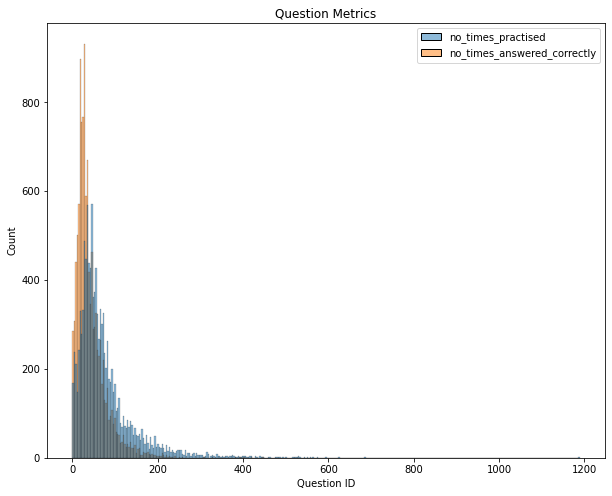

In [1114]:
plt.figure(figsize = (10,8))
sns.histplot(questionsresult[['no_times_practised','no_times_answered_correctly']])
plt.title('Question Metrics')
plt.xlabel('Question ID')
plt.show()